**Dataanalyse og Machine Learning (F24.520214U002.A)  
Gruppe 1:  
Hans Christian Hulvej - AU19930532  
Kathrine Bohus Madsen - AU202301227  
Tor Kolding - AU20000148  
Torben Holst Rendboe – AU20064217**
---------------------------------------------------

## DAoML 2024 Gruppe1 Opgave2 Supervised ML - WineQuality

Vi har valgt at arbejde med datasettet "Wine Quality dataset" fra Kaggle.
Datasettet indeholder mange objektive "features" som sukkerindhold, syre, alkoholprocent og PH-værdi, mens den sidste feature/attribut er det mere subjektive "quality".  

Vi vil gerne skabe en supervised machine-learning model, der kan forudsige en vins kvalitetsbedømmelse ud fra de objektive kriterier, og dermed nærme os et svar på, hvilke objektive egenskaber, der gør vin attraktivt.

## Hent data og analyser den

Første step, er at importere de relevante biblioteker til databehandling og visualise

In [1]:
import sklearn
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import scikitplot as skplt

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

Nu henter vi vores csv fil ind i en dataFrame  
I dette tilfælde er det fra Kaggle og omhandler vin kvalitet  
https://www.kaggle.com/datasets/yasserh/wine-quality-dataset  
  
PS. det leveres i en zip fil, som skal pakkes ud og placeres i samme folder som koden.

In [2]:
dataFrame = pd.read_csv("WineQT.csv")

Lad os nu se på dataFramen... vi nøjes med de første 5 rækker i starten.  
Grunden til at vi visualiserer data, er for at få overblik over *struktur*, *features* og *target*

In [3]:
dataFrame.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


En anden måde at få overblik på er ved at vise data.

In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Vi kan se at vi har 11 kolonner med *features* og *target* i kolonne 12

Og så lige en tredie måde, hvor vi ser de første 5 rækker og de sidste 5 rækker.

In [5]:
print("data i Wine Quality....\n\n",dataFrame)

data i Wine Quality....

       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

 

Vi kan også lave en statistisk beskrivelse af datasettet ved at bruge describe metoden

In [6]:
dataFrame.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### Så skal data renses. 

In [7]:
dataFrame.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

og tjekkes igen

In [8]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## Opdel data i feature og target data

Så skal vi til at definerer features(x) og target(y)  
y = w1x1 + w2x2 + ........ +wnxn

Lad os nu få se på kolonnerne alene, ved at bruge variabelkaldet columns, får vi en liste over kolonne navnene.

In [9]:
dataFrame.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

og lad os oversætte kolonne navnene med metode rename()

In [10]:
dataFrame.rename(columns={'fixed acidity':'fast surhedsgrad', 'volatile acidity':'flygtig surhed', 'citric acid':'citronsyre', 'residual sugar':'restsukker',
       'chlorides':'chlorider', 'free sulfur dioxide':'fri svovldioxid', 'total sulfur dioxide':'total svovldioxid', 'density':'massefylde',
       'pH':'pH', 'sulphates':'sulfater', 'alcohol':'alkohol', 'quality':'kvalitet', 'Id':'Id'}, inplace=True)

Nu definerer vi y, som tages ud fra listen over kolonner, og da y kun har en target, skal vi blot bruge quality.  
PS. det er altid en god ide at copy paste fra kolonne oversigten, så vi undgår slå fejl.  
PPS. og vi bruger notationerne y_target og x_feature i stedet for y og x

In [11]:
dataFrame.columns

Index(['fast surhedsgrad', 'flygtig surhed', 'citronsyre', 'restsukker',
       'chlorider', 'fri svovldioxid', 'total svovldioxid', 'massefylde', 'pH',
       'sulfater', 'alkohol', 'kvalitet', 'Id'],
      dtype='object')

Jeg gemmer min dataframe til senere brug (dataFrameOrg)

In [12]:
dataFrameOrg = dataFrame

In [13]:
y_target = dataFrame['kvalitet']

og det samme med x, med den forskel at her har vi en hel liste af kolonne navne, så husk dobbelt square bracket (en til pointer og en til liste.

In [14]:
x_feature = dataFrame[['fast surhedsgrad', 'flygtig surhed', 'citronsyre', 'restsukker',
       'chlorider', 'fri svovldioxid', 'total svovldioxid', 'massefylde', 'pH',
       'sulfater', 'alkohol']]

Lad os nu se på lidt shape

In [15]:
y_target.shape

(1143,)

In [16]:
x_feature.shape

(1143, 11)

Vi kan ud fra tallene se, at target indeholder 1 kolonne (intet nummer efter række tælleren betyder en kolonne) og feature har 11 kolonner.

## Spliting data

Og nu bliver det spændende. Vi skal have splittet vores data i trainings data og test data.  
Det gør vi ved at bruge train test split metoden som vi hentede fra model selection, under sklearn

Nu splitter vi vores features og target i train set og test set (by default 75% / 25%)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_feature, y_target)

In [18]:
x_train.shape, x_test.shape

((857, 11), (286, 11))

75% af 1600 rækker er 1200 rækker, OK

Kig på train_test_split metoden og undersøg alle de **parameter** I kan anvende. Især test og training size samt random state

For at vær sikre på altid at få det samme dataset i  både train og test, anvender vi random state 9598 (og 75% / 25%)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_feature, y_target, train_size = 0.75, random_state = 9598)

### Lad os kigge lidt på correlation mellem de enkelte features

Først finder vi correlationen, som vi viser i en tabel

In [20]:
dataFrameCor = dataFrameOrg.drop("Id", axis = 1)

correlation = dataFrameCor.corr()
correlation

,fast surhedsgrad,flygtig surhed,citronsyre,restsukker,chlorider,fri svovldioxid,total svovldioxid,massefylde,pH,sulfater,alkohol,kvalitet
fast surhedsgrad,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
flygtig surhed,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citronsyre,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
restsukker,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorider,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
fri svovldioxid,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total svovldioxid,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
massefylde,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulfater,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


Og så i et heatmap...

<div class="alert-warning" style="border-style: solid; padding:5px;">
<h2>FAKTA BOKS</h2>  
    
Her er hvad **copilot** siger til visualisering af *korrelation*  
    
Når der er mange variabler, kan det blive komplekst at visualisere korrelationen mellem dem. Her er nogle tilgange til at håndtere dette:

1. Korrelationsmatrix (Heatmap): Opret en korrelationsmatrix, hvor hver celle indeholder korrelationskoefficienten mellem to variabler. Dette giver dig et overblik over, hvordan alle variabler er relateret til hinanden. Jo varmere farven er, desto stærkere er korrelationen.  
    
2. Dimensionalitetsreduktion: Brug teknikker som PCA (Principal Component Analysis) eller t-SNE (t-distributed Stochastic Neighbor Embedding) til at reducere antallet af dimensioner. Dette gør det lettere at visualisere sammenhængen mellem variablerne i et lavere-dimensionelt rum.  
    
3. Parplot (Pair Plot): Hvis du har flere variabler, kan du bruge et parplot. Det viser scatterplots for alle kombinationer af variabler. Dette giver dig en visuel idé om, hvordan variablerne hænger sammen.  
    
4. Netværksgraf: Hvis variablerne repræsenterer forbindelser (f.eks. sociale netværk), kan du oprette et netværksgraf. Hver variabel er en knude, og forbindelserne mellem dem er kanter. Dette hjælper med at identificere komplekse relationer.  
    
5. Klyngeanalyse: Gruppér lignende variabler i klynger. Dette kan hjælpe med at afsløre mønstre og relationer mellem grupper af variabler.  
    
<i>Husk, at det bedste valg af metode afhænger af dine data og det specifikke problem, du forsøger at løse.</i>
    
<b>Hvis du bruger et heatmap til korrelation, kan det hjælpe dig med at visualisere, hvordan to variabler relaterer sig til hinanden. Lad mig forklare:</b>

1. Korrelation handler om at forstå, hvor tæt to variabler bevæger sig sammen. Hvis de bevæger sig i samme retning (begge stiger eller falder), er de positivt korrelerede. Hvis de bevæger sig i modsatte retninger (den ene stiger, mens den anden falder), er de negativt korrelerede.  
  
2. Forestil dig, at vi har data om temperatur og is-salg i en by. Vi vil gerne vide, om der er en sammenhæng mellem disse to variabler. Vi kan bruge et heatmap til at vise, hvor stærkt de to variabler er forbundet.  
  
3. Her er, hvordan vi gør det:
    Vi opretter et heatmap, hvor x-aksen repræsenterer temperatur og y-aksen repræsenterer is-salg.
    Hver celle i heatmapet farves baseret på korrelationskoefficienten mellem temperatur og is-salg. Jo varmere farven er, desto stærkere er korrelationen.
    Hvis cellen er rød, betyder det, at højere temperaturer er forbundet med mere is-salg (positiv korrelation).
    Hvis cellen er blå, betyder det, at højere temperaturer er forbundet med mindre is-salg (negativ korrelation).  
    
4. Så kort sagt: Et heatmap kan hjælpe os med at se, hvordan to variabler hænger sammen, og om der er en sammenhæng mellem dem. 

Hvis du vil udforske korrelation mellem specifikke variabler, kan du bruge værktøjer som Python-biblioteket Seaborn til at generere korrelationsheatmaps. 
</div>

<Axes: >

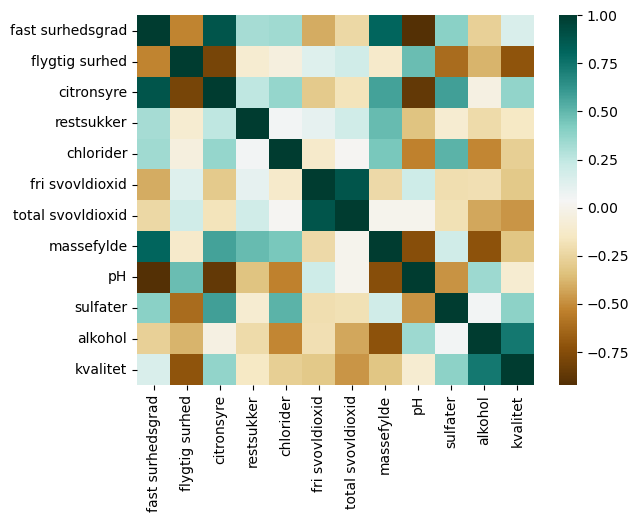

In [21]:
#displaying seaborn heatmap for correlation
sns.heatmap(correlation.corr(),cmap="BrBG",annot=False)

Lad os se på correlationen mellem de enkelte *features* og *target* og lave en <h2> Korrelationstabel </h2>

In [22]:
print("%-22s: %s" % ("Variable", "Correlation to Target"))
print("%-22s  %s" % ("--------", "---------------------"))

for i in range(dataFrameOrg.shape[1] - 1):
    label = dataFrameOrg.columns[i]
    correlation = np.corrcoef(dataFrameOrg[label], dataFrameOrg["kvalitet"])[0, 1]
    print("%-22s: %f" % (label, correlation))


dataFrameOrg = dataFrameOrg.drop("restsukker", axis = 1)
dataFrameOrg = dataFrameOrg.drop("pH", axis = 1)


data = np.array(dataFrameOrg)
np.random.shuffle(data)

Variable              : Correlation to Target
--------                ---------------------
fast surhedsgrad      : 0.121970
flygtig surhed        : -0.407394
citronsyre            : 0.240821
restsukker            : 0.022002
chlorider             : -0.124085
fri svovldioxid       : -0.063260
total svovldioxid     : -0.183339
massefylde            : -0.175208
pH                    : -0.052453
sulfater              : 0.257710
alkohol               : 0.484866
kvalitet              : 1.000000


## Identificere problemets type og valg af model/algoritme

Ved at kigge på *dataFrame.head()*, kan vi se at target (*quality*) er inden for et bestemt område (*3 .. 8*) og ikke et kontinueret nummerisk område. Det vil sige at der er tale om **Classification**, og ikke et **Regressions** promblem .  
Når det er **Classification** problem, bruger vi *Logistic Regression* og derefter *KNN*, som vi har importeret.

In [23]:
model = LogisticRegression(max_iter = 10000)     # husk kommentar på max_iter (kun brugt sammen med LogisticRegression)
knn_clf = KNeighborsClassifier(n_neighbors=5)    # husk også kommentar her

## Først træner vi Logistic data og tilpaser modelen

In [24]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

## forudsig resultat

Predict the Model error = actual - predict

In [25]:
y_pred = model.predict(x_test)

y_pred # og vi ser lige y_pred

array([6, 6, 6, 7, 6, 5, 5, 5, 6, 6, 7, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5,
       5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 7, 5, 6, 6, 6, 5, 5, 6, 6,
       6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 5, 5, 6, 7, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 7, 6, 6, 6,
       6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 5, 5, 6, 6, 6,
       5, 6, 7, 5, 6, 7, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6,
       7, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 7, 5, 6, 5, 6, 6, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 5, 5, 6, 5, 5, 6,
       5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 7, 6,
       7, 6, 6, 5, 7, 5, 5, 6, 7, 6, 7, 5, 5, 5, 5, 6, 6, 7, 7, 6, 6, 5,
       6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5,
       5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 7, 6, 3, 5, 6],
      dtype=int64)

Forudsigelser ud fra de 286 test værdier. ??

## Modellens nøjagtighed

In [26]:
accuracy_score(y_test, y_pred)

0.5734265734265734

In [27]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        12
           5       0.63      0.70      0.66       111
           6       0.56      0.63      0.59       124
           7       0.38      0.23      0.29        35
           8       0.00      0.00      0.00         3

    accuracy                           0.57       286
   macro avg       0.26      0.26      0.26       286
weighted avg       0.53      0.57      0.55       286



C:\Users\thr\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thr\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thr\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div class="alert-warning" style="border-style: solid; padding:5px;">
<h2>FAKTA BOKS</h2>  
    
Her er hvad **copilot** siger til *flerklasse forvirringsmatrix*  
  
En flerklasse-forvirringsmatrix fungerer på samme måde som en enkeltklasse-forvirringsmatrix, men den håndterer flere klasser i stedet for kun to. Lad mig forklare:

Struktur:
I en flerklasse-forvirringsmatrix har vi rækker og kolonner for hver klasse.
Forventede klasser er på rækkerne, og forudsagte klasser er på kolonnerne.
Eksempel:
Forestil dig, vi har en model, der skal forudsige, om et billede indeholder en hund, en kat eller en fugl.
Vores flerklasse-forvirringsmatrix kan se sådan ud:
  
 ![eksempel](confusionMatrixExample.png)
  
I dette eksempel:
80 billeder af hunde blev korrekt forudsagt som hunde.
70 billeder af katte blev korrekt forudsagt som katte.
85 billeder af fugle blev korrekt forudsagt som fugle.
Der er også nogle fejl, f.eks. 10 kattebilleder, der blev forkert forudsagt som hunde.
Metrikker:
Ud over nøjagtighed kan vi beregne andre metrikker som præcision, følsomhed og F1-score for hver klasse.
Det hjælper os med at forstå, hvilke klasser modellen har svært ved at skelne mellem.
Så kort sagt: En flerklasse-forvirringsmatrix giver os mere detaljeret indsigt i, hvordan en model klarer sig for flere klasser .
</div>

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  6,  5,  1,  0],
       [ 1,  0, 78, 30,  2,  0],
       [ 0,  0, 37, 78,  9,  0],
       [ 0,  0,  2, 25,  8,  0],
       [ 0,  0,  0,  2,  1,  0]], dtype=int64)

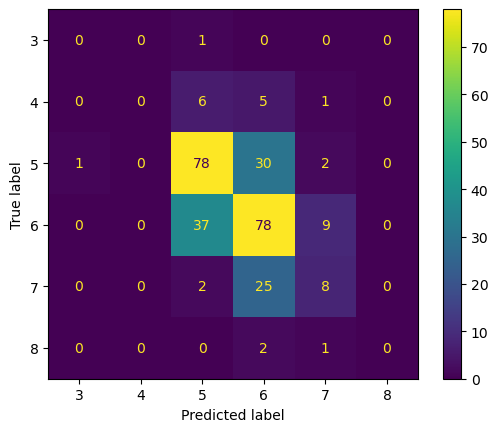

In [29]:
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot()

## Så træner vi KNN data og tilpaser modelen  

In [30]:
classifier = knn_clf.fit(x_train, y_train)

In [31]:
y_pred = classifier.predict(x_test)

In [32]:
print(confusion_matrix(y_test,y_pred))

[[ 0  0  1  0  0  0]
 [ 0  0 11  1  0  0]
 [ 0  1 75 33  2  0]
 [ 0  0 67 50  7  0]
 [ 0  0 14 13  8  0]
 [ 0  0  2  1  0  0]]


Eller i et ConfusionMatrixDisplay:

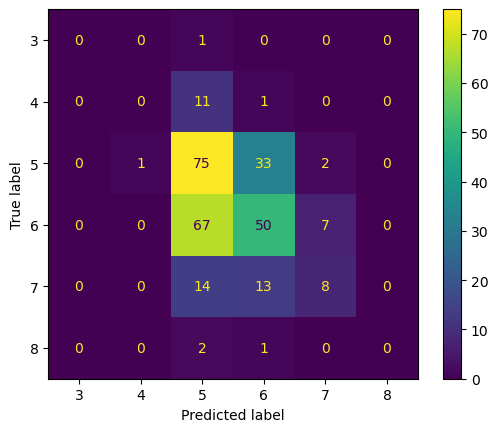

In [33]:
cmt = confusion_matrix(y_test,y_pred)
cmdt = ConfusionMatrixDisplay(cmt, display_labels=model.classes_)
cmdt.plot()

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        12
           5       0.44      0.68      0.53       111
           6       0.51      0.40      0.45       124
           7       0.47      0.23      0.31        35
           8       0.00      0.00      0.00         3

    accuracy                           0.47       286
   macro avg       0.24      0.22      0.22       286
weighted avg       0.45      0.47      0.44       286



C:\Users\thr\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thr\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thr\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print(accuracy_score(y_test, y_pred))

0.46503496503496505


#### lidt ekstra - Cross Validation Performance Plot 

<div class="alert-warning" style="border-style: solid; padding:5px;">
    <h2>FAKTA BOKS</h2>  
    
Her er hvad **copilot** siger til *krydsvalideringsmodellen*:  
  
Når vi træner en maskinlæringsmodel, ønsker vi at evaluere dens præstation på data, som den ikke tidligere har set. Dette er vigtigt for at undgå overtilpasning, hvor modellen lærer at huske træningsdataene uden at generalisere godt til nye data.

Her er, hvordan krydsvalidering hjælper os med at gøre dette:

Opdeling af data: Vi deler vores tilgængelige data i tre dele:
Træningssæt: Bruges til at træne modellen.
Valideringssæt: Bruges til at justere modellens parametre og undgå overtilpasning.
Testssæt: Bruges til endelig evaluering af modellen.
Krydsvalidering (CV): I stedet for at bruge et enkelt valideringssæt, opdeler vi træningssættet i mindre dele (kaldet fold). Vi træner modellen på n-1 fold og evaluerer den på den sidste fold. Dette gentages n gange, hvor hver fold fungerer som valideringssæt. Resultaterne fra alle n evalueringer kombineres for at få en mere robust præstationsmåling.
Performance Plot: Dette er en graf, der viser, hvordan modellen klarer sig på forskellige valideringsfolds. Vi kan se, om modellen har tendens til at overtilpasse eller underpræstere. Hvis punkterne på plottet er tæt på hinanden, betyder det, at modellen generaliserer godt.
Så kort sagt: Cross Validation Performance Plot hjælper os med at vurdere, hvor godt vores model klarer sig på ukendte data ved at bruge krydsvalideringsteknikken.  
    </div>

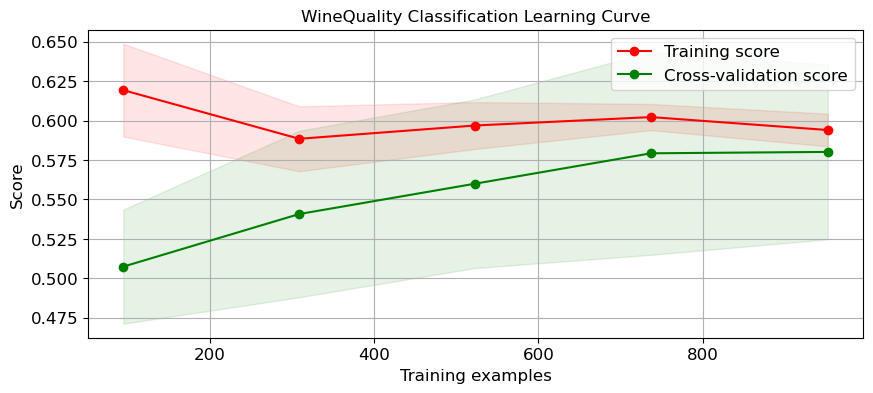

In [36]:
skplt.estimators.plot_learning_curve(LogisticRegression(), x_feature, y_target,
                                     cv=6, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(10,4), title_fontsize="large", text_fontsize="large",
                                     title="WineQuality Classification Learning Curve");

## Forudsigelse og træning med færre features

Vi kan se på accuracy scorren, at det ikke er gået så godt med den trænede model. Vi vil derfor, ud fra korrelationstabellen, forsøg at fjerne de features som den dårligste korrelation med kvaliteten (target).  
  
*Vi fjerne:*  

restsukker            : 0.022002  
fri svovldioxid       : -0.063260  
pH                    : -0.052453  

In [37]:
x_feature = dataFrame[['fast surhedsgrad', 'flygtig surhed', 'citronsyre',
       'chlorider', 'total svovldioxid', 'massefylde', 'sulfater', 'alkohol']]

**Så splitter vi data:**

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_feature, y_target, train_size = 0.75, random_state = 9598)

**Først træner vi Logistic data og tilpaser modelen**

In [39]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

**Så forudsiger vi resultatet.**

In [40]:
y_pred = model.predict(x_test)

**Og finder modellens nøjagtighed.**

In [41]:
accuracy_score(y_test, y_pred)

0.5664335664335665

**Vi kan ud fra accuracy_score se at accuracy ved færre features og logisticRegressionsmodel, ser ud til at blive mindre (0.5664 mod 0.5734) ved mange features.**

**Så træner vi den med KNN modellen**

In [42]:
classifier = knn_clf.fit(x_train, y_train)

**Og forudsiger resultatet.**

In [43]:
y_pred = classifier.predict(x_test)

**Og finder denne models nøjagtighed.**

In [44]:
print(accuracy_score(y_test, y_pred))

0.5209790209790209


**Nu viser det sig at accuracy_scorren af accuracy ved færre features og KNN modellen, ser ud til at være bedre (0.5210 mod 0.4650) end ved mange features, hvoraf mange havde dårlig korrelation.**

<div class="alert-warning" style="border-style: solid; padding:5px;">
    <h2>FAKTA BOKS</h2>  
    
Her er hvad **copilot** siger til anvendelsen af *Logistisk Regression* modellen og *K-Nearest Neighbors* modellen:  
  
Når du reducerer antallet af funktioner (features) i dit maskinlæringsproblem, er det vigtigt at vælge den rette algoritme. Lad os sammenligne Logistisk Regression og K-Nearest Neighbors (KNN) for at afgøre, hvilken der passer bedst til din situation:

1. Logistisk Regression:
    * Beskrivelse: Logistisk regression er en klassifikationsalgoritme, der arbejder ud fra princippet om maksimal likelihood-estimering. Den fungerer godt på lineære data og er nem at implementere.  
    * Fordele:  
        * En bekvem, hurtig og enkel metode til klassifikation.  
        * Parametrene angiver retningen og intensiteten af betydningen af de uafhængige variable for den afhængige variabel.  
        * Kan bruges til flerklassesklassifikation.  
        * Tabelfunktionen er altid konveks.  
    * Ulemper:  
        * Kan ikke udvides til problemer med ikke-lineær klassifikation.  
        * Kræver korrekt valg af funktioner (features).  
        * Kræver en god signal-til-støj-forhold.  
2. K-Nearest Neighbors (KNN):  
    * Beskrivelse: KNN er en ikke-parametrisk tilgang, der bruges til både klassifikation og regression. Det er en af de enkleste metoder inden for maskinlæring.  
    * Fordele:  
        * Bruger lokal tilnærmelse og er en “dovent” model, der kun laver forudsigelser under testfasen.  
        * Grundlæggende logik: Udforsk nabolaget, antag, at de er sammenlignelige med testdatapunktet, og udled output.  
        * Kan bruges til både klassifikation og regression.  
    * Ulemper:  
        * Kræver valg af et passende antal naboer (k).  
        * Kan være følsom over for støj og outliers.  
  
Valget mellem disse to algoritmer afhænger af dine datakarakteristika og opgavekrav. Hvis dine data har en klar lineær sammenhæng, og du ønsker fortolkbarhed, kan logistisk regression være det bedste valg. Hvis du ønsker en mere generel tilgang uden at antage en bestemt form for sammenhæng, kan KNN være mere passende
</div>